# <font color = "#285BD4"> Statistics Core Concepts </font>

This notebook is for a revision of key statistical concepts such as summary statistics, random numbers and probability, More Distributions, the Central Limit Theorem, Correlation and Experimental Design

## <font color = "#6C98C6"> Importing Libraries and Data </font>

In [196]:
# Import libraries
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import uniform # Import uniform from scipy.stats
from scipy.stats import binom #import binom from scipy.stats
from scipy.stats import norm #import normal distribution
from scipy.stats import poisson #import poisson distribution 
from scipy.stats import expon #import exponential distribution
from scipy.stats import bernoulli #import bernoulli distribution
from scipy.stats import describe #import describe from scipy.stats
from scipy.stats import find_repeats, relfreq #import find_repeats and relfreq from scipy.stats
from scipy.stats import geom #import geometric distribution

data = Path('C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA/data_sets')
food_consumption = pd.read_csv(data/'food_consumption.csv',index_col=0)
amir_deals = pd.read_csv(data/'amir_deals.csv',index_col=0)
world_happiness = pd.read_csv(data/'world_happiness.csv',index_col=0)

## <font color = "#6C98C6">  Summary Statistics </font>

Summary statistics are a way of summarising a set of data. They are useful for getting a quick overview of a set of data. They are also useful for comparing sets of data.

### <font color = "#18A4E0"> Measures of Center </font>

Measures of Center are used to describe the central tendency of a distribution. The three most common measures of center are the mean, median, and mode. The mean is the average of a distribution, the median is the middle value of a distribution, and the mode is the most common value of a distribution. The mean is the most commonly used measure of center, but it is not always the best measure of center. The median is a better measure of center when there are outliers in the data. The mode is a better measure of center when the data is categorical.

In [197]:
usa_be_consumption = food_consumption[(food_consumption['country'] == 'USA') | (food_consumption['country'] == 'Belgium')]
usa_be_consumption.groupby('country')['consumption'].agg(['mean','median'])

,mean,median
country,,
Belgium,42.132727,12.59
USA,44.650000,14.58


mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


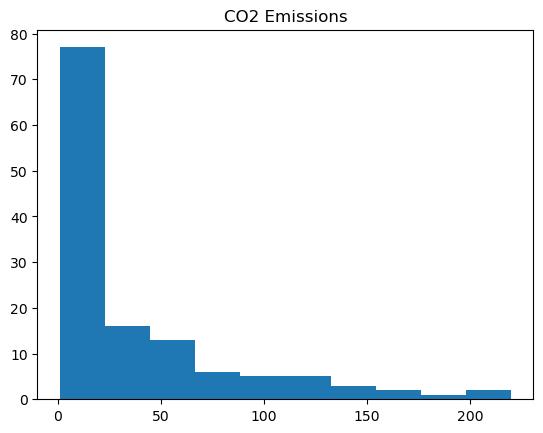

In [198]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption.food_category == 'rice']
print(rice_consumption['co2_emission'].agg(['mean','median']))

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption.co2_emission)
plt.title('CO2 Emissions')
plt.show()

### <font color = "#18A4E0"> Measures of Spread </font>

Measure of spread are important in understanding the variability of a distribution. The three most common measures of spread are the range, interquartile range, and standard deviation. The range is the difference between the largest and smallest values in a distribution. The interquartile range is the difference between the 75th percentile and the 25th percentile of a distribution. The standard deviation is a measure of how spread out the values in a distribution are. The standard deviation is the square root of the variance. The variance is the average of the squared differences between each value and the mean of the distribution. The standard deviation is the most commonly used measure of spread, but it is not always the best measure of spread. The interquartile range is a better measure of spread when there are outliers in the data.

In [199]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption.co2_emission, [0,0.25,0.5,0.75,1]))
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption.co2_emission, [0,0.20,0.4,0.6,0.8,1]))
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption.co2_emission, [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


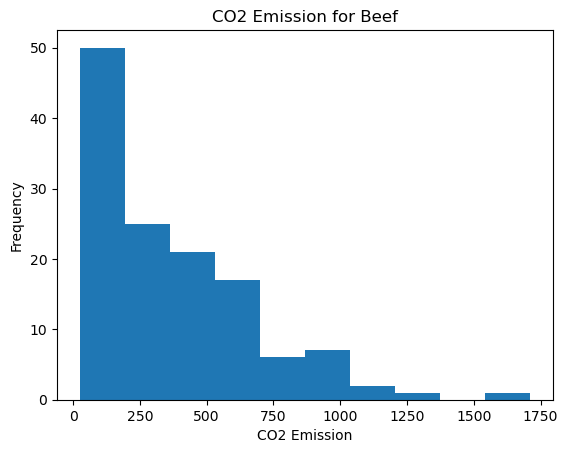

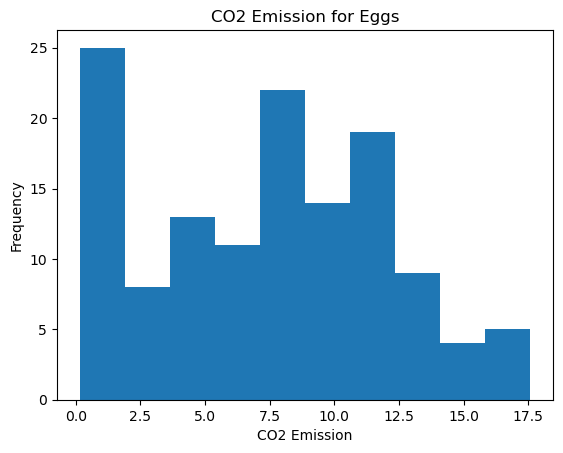

In [200]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var','std']))
# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption[food_consumption.food_category == 'beef'].co2_emission)
plt.xlabel('CO2 Emission')
plt.ylabel('Frequency')
plt.title('CO2 Emission for Beef')
plt.show()
# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption.food_category == 'eggs'].co2_emission)
plt.xlabel('CO2 Emission')
plt.ylabel('Frequency')
plt.title('CO2 Emission for Eggs')
# Show plot
plt.show()

In [201]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


## <font color = "#6C98C6">  Probability </font>


Probability is the likelihood that an event will occur. The probability of an event is a number between 0 and 1. The probability of an event is the number of ways that the event can occur divided by the total number of possible outcomes. The probability of an event is the complement of the probability of the event not occurring. The probability of an event is the sum of the probabilities of all the events that are mutually exclusive and exhaustive. The probability of an event is the product of the probabilities of all the events that are independent.


In [202]:
# Simulate one coin flip with 35% chance of getting heads
coin_flip = bernoulli.rvs(p=0.35, size=1)
print(coin_flip)

# Simulate ten coin flips and get the number of heads
ten_coin_flips = bernoulli.rvs(p=0.35, size=10)
coin_flips_sum = sum(ten_coin_flips)
print(coin_flips_sum)

# Simulate ten coin flips and get the number of heads
five_coin_flips = bernoulli.rvs(p=0.5, size=10)
coin_flips_sum = sum(five_coin_flips)
print(coin_flips_sum)

[1]
4
2


In [203]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts,'\n')

# Calculate probability of picking a deal with each product
probs = round((counts / len(amir_deals)) * 100, 2)
print(probs)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64 

Product B    34.83
Product D    22.47
Product A    12.92
Product C     8.43
Product F     6.18
Product H     4.49
Product I     3.93
Product E     2.81
Product N     1.69
Product G     1.12
Product J     1.12
Name: product, dtype: float64


In [204]:
# Set random seed
np.random.seed(24)  

# Sample 5 deals with replacement it is set to take sample without replacement by default
sample_without_replacement = amir_deals.sample(5, replace=True)
print(sample_without_replacement)

       product   client status   amount  num_users
163  Product D  Current    Won  6755.66         59
132  Product B  Current    Won  6872.29         25
88   Product C  Current    Won  3579.63          3
146  Product A  Current    Won  4682.94         63
146  Product A  Current    Won  4682.94         63


In [205]:
# Create sample of 1000 flips
sample_of_two_coin_flips = binom.rvs(n=2, p=0.5, size=1000)

# Count how many times you got 2 heads from the sample data
count_2_heads = find_repeats(sample_of_two_coin_flips).counts[2]

# Divide the number of heads by the total number of draws
prob_2_heads = count_2_heads / 1000

# Display the result
print(prob_2_heads)

0.257


In [206]:
# Get the relative frequency from sample_of_two_coin_flips
# Set numbins as 3
# Extract frequency
rel_freq = relfreq(sample_of_two_coin_flips, numbins=3).frequency
print(rel_freq)

[0.232 0.511 0.257]


In [207]:
# Probability of getting 0, 1, or 2 from the distribution
probabilities = binom.pmf([0, 1, 2], n=2, p=0.5)
print(probabilities)

[0.25 0.5  0.25]


Take the values from the table, create variables, and calculate the probability of the event in each step.

![](https://assets.datacamp.com/production/repositories/3819/datasets/cee10abf503db19eb82cf5eb1cda124ed1337b3a/Datacamp-Slides-Ex.png)

In [208]:
# Individual probabilities
P_Eng_works = 0.99
P_GearB_works = 0.995

# Joint probability calculation
P_both_works = P_Eng_works * P_GearB_works

print(P_both_works)

0.98505


In [209]:
# Individual probabilities
P_Eng_fails = 0.01
P_Eng_works = 0.99
P_GearB_fails = 0.005
P_GearB_works = 0.995

# Joint probability calculation
P_only_GearB_fails = P_GearB_fails * P_Eng_works
P_only_Eng_fails = P_Eng_fails * P_GearB_works

# Calculate result
P_one_fails = P_only_GearB_fails + P_only_Eng_fails

print(P_one_fails)

0.0149


In [210]:
# Individual probabilities
P_Eng_fails = 0.01
P_Eng_works = 0.99
P_GearB_fails = 0.005
P_GearB_works = 0.995

# Joint probability calculation
P_EngW_GearBW = P_GearB_works * P_Eng_works
P_EngF_GearBF = P_Eng_fails * P_GearB_fails

# Calculate result
P_fails_or_works = P_EngW_GearBW + P_EngF_GearBF

print(P_fails_or_works)

0.9851


#### <font color = "skyblue"> Working with Probabilities in Cards </font>

![](https://assets.datacamp.com/production/repositories/3819/datasets/8058ee2cc91dd029518cd28ac1f42ae75408f5cd/cards.png)

In [211]:
# Ace probability
P_Ace = 4/52

# Not Ace probability
P_not_Ace = 1 - P_Ace

print(f'Probability of drawing an Ace: {P_Ace}')
print(f'Probability of not drawing an Ace: {P_not_Ace}')

Probability of drawing an Ace: 0.07692307692307693
Probability of not drawing an Ace: 0.9230769230769231


In [212]:
# Figure probabilities
P_Hearts = 13/52
P_Diamonds = 13/52

# Probability of red calculation
P_Red = P_Hearts + P_Diamonds

print(f'Probability of drawing a red card: {P_Red}')
print(f'Probability of drawing a black card: {1 - P_Red}')

Probability of drawing a red card: 0.5
Probability of drawing a black card: 0.5


In [213]:
# Figure probabilities
P_Jack = 4/52
P_Spade = 13/52

# Joint probability
P_Jack_n_Spade = 1/52

# Probability of Jack or spade
P_Jack_or_Spade = P_Jack + P_Spade - P_Jack_n_Spade

print(f'Probability of drawing a Jack or a Spade: {P_Jack_or_Spade}')
print(f'Probability of drawing a Jack and a Spade: {P_Jack_n_Spade}')

Probability of drawing a Jack or a Spade: 0.3076923076923077
Probability of drawing a Jack and a Spade: 0.019230769230769232


In [214]:
# Figure probabilities
P_King = 4/52
P_Queen = 4/52

# Joint probability
P_King_n_Queen = 0

# Probability of King or Queen
P_King_or_Queen = P_King + P_Queen - P_King_n_Queen

print(f'Probability of drawing a King or a Queen: {P_King_or_Queen}')
print(f'Probability of drawing a King and a Queen: {P_King_n_Queen}')

Probability of drawing a King or a Queen: 0.15384615384615385
Probability of drawing a King and a Queen: 0


In [215]:
# Calculate the probability of getting two Jacks (P(Jack and Jack))
P_first_Jack = 4/52
P_Jack_given_Jack = 3/51

# Joint probability calculation
P_two_Jacks = P_Jack_given_Jack * P_first_Jack

print(f'Probability of drawing two Jacks: {P_two_Jacks}')

# Calculate P(Ace|Spade).
P_Spade = 13/52
P_Spade_n_Ace = 1/52

# Conditional probability calculation
P_Ace_given_Spade = P_Spade_n_Ace / P_Spade

print(f'Probability of drawing an Ace given that it is a Spade: {P_Ace_given_Spade}')

# Calculate P(Queen|Face card).
P_Face_card = 12/52
P_Face_card_n_Queen = 4/52

# Conditional probability calculation
P_Queen_given_Face = P_Face_card_n_Queen / P_Face_card

print(f'Probability of drawing a Queen given that it is a Face card: {P_Queen_given_Face}')

Probability of drawing two Jacks: 0.004524886877828055
Probability of drawing an Ace given that it is a Spade: 0.07692307692307693
Probability of drawing a Queen given that it is a Face card: 0.3333333333333333


The following table shows the numbers of red and black cards in a deck that are Aces and non-Aces:

| |Red|Black|Total|
|:-|:-|:-|:-|
|Ace|2|2|4|
|Non-Ace|24|24|48|
|Total|26|26|52|

The total in the Red column is 26, which means there are 26 red cards in the deck. Of these, 2 are Aces and 24 are non-Aces. There are 52 cards in a deck. Use the values in the table to calculate some conditional probabilities.

In [216]:
# Calculate P(Ace|Red)
P_Red = 26/52
P_Red_n_Ace = 2/52

# Conditional probability calculation
P_Ace_given_Red = P_Red_n_Ace / P_Red

print(f'Probability of drawing an Ace given that the card is red: {P_Ace_given_Red}')

# Calculate P(Black|Ace)
P_Ace = 4/52
P_Ace_n_Black = 2/52

# Conditional probability calculation
P_Black_given_Ace = P_Ace_n_Black / P_Ace

print(f'Probability of drawing a black card given that the card is an Ace: {P_Black_given_Ace}')

# Calculate P(Non Ace|Black)
# Individual probabilities
P_Black = 26/52
P_Black_n_Non_ace = 24/52

# Conditional probability calculation
P_Non_ace_given_Black = P_Black_n_Non_ace / P_Black

print(f'Probability of drawing a non Ace given that the card is black: {P_Non_ace_given_Black}')

# Calculate P(Red|Non Ace)

# Individual probabilities
P_Non_ace = 48/52
P_Non_ace_n_Red = 24/52

# Conditional probability calculation
P_Red_given_Non_ace = P_Non_ace_n_Red / P_Non_ace

print(f'Probability of drawing a red card given that the card is not an Ace: {P_Red_given_Non_ace}')

Probability of drawing an Ace given that the card is red: 0.07692307692307693
Probability of drawing a black card given that the card is an Ace: 0.5
Probability of drawing a non Ace given that the card is black: 0.9230769230769231
Probability of drawing a red card given that the card is not an Ace: 0.5


#### <font color = 'skyblue'> Some other examples of probability </font>

A certain airline offers flights departing to New York on Tuesdays and Fridays, but sometimes the flights are delayed:
| |Delayed|On Time|Total|
|:-|:-|:-|:-|
|Tuesday|24|114|138|
|Friday|11|127|138|
|Total|35|241|276|

At the bottom of the Delayed column you have a total of 35, which means there were 35 delayed flights out of the total of 276 departures in the sample. Of these, 24 were on Tuesday and 11 on Friday.

In [217]:
# What is the probability of a flight being on time?
# Needed quantities
On_time = 241
Total_departures = 276

# Probability calculation
P_On_time = On_time / Total_departures

print(f'Probability of a flight being on time: {P_On_time}')

# Probability calculation
P_Delayed = 1 - P_On_time

print(f'Probability of a flight being delayed: {P_Delayed}')

# Given that it's Tuesday, what is the probability of a flight being delayed (P(Delayed|Tuesday))?
Delayed_on_Tuesday = 24
On_Tuesday = 138

# Probability calculation
P_Delayed_g_Tuesday = Delayed_on_Tuesday / On_Tuesday

print(f'Probability of a flight being delayed on Tuesday: {P_Delayed_g_Tuesday}')

# Given that it's Friday, what is the probability of a flight being delayed (P(Delayed|Friday))?
Delayed_on_Friday = 11
On_Friday = 138

# Probability calculation
P_Delayed_g_Friday = Delayed_on_Friday / On_Friday

print(f'Probability of a flight being delayed on Friday: {P_Delayed_g_Friday}')

Probability of a flight being on time: 0.8731884057971014
Probability of a flight being delayed: 0.12681159420289856
Probability of a flight being delayed on Tuesday: 0.17391304347826086
Probability of a flight being delayed on Friday: 0.07971014492753623


#### <font color = 'skyblue'> Total probability law </font>

Suppose that two manufacturers, A and B, supply the engines for Formula 1 racing cars, with the following characteristics:

* 99% of the engines from factory A last more than 5,000 km.
* Factory B manufactures engines that last more than 5,000 km with 95% probability.
* 70% of the engines are from manufacturer A, and the rest are produced by manufacturer B. </br></br>
What is the chance that an engine will last more than 5,000 km?

In [218]:
# The manufacturer is A (P_A)
# Needed probabilities
P_A = 0.7
P_last5000_g_A = 0.9
P_B = 0.3
P_last5000_g_B = 0.95

# Total probability calculation
P_last_5000 = P_last5000_g_A * P_A + P_last5000_g_B * P_B

print(f'Probability that car lasts 5000 miles: {P_last_5000}')

Probability that car lasts 5000 miles: 0.915


Of the total population of three states X, Y, and Z, 43% are from state X, 25% are from state Y, and 32% are from state Z. A poll is taken and the result is the following:

* 53% of the voters support John Doe in state X.
* 67% of the voters support John Doe in state Y.
* 32% of the voters support John Doe in state Z.</br></br>
Given that a voter supports John Doe, answer the following questions.

In [219]:
# What is the probability that the voter lives in state X and supports John Doe?
P_X = 0.43

# Conditional probabilities
P_Support_g_X = 0.53

# Total probability calculation
P_X_n_Support = P_X * P_Support_g_X
print(f'Probability that the voter lives in state X and supports John Doe: {P_X_n_Support}')

# What is the probability that the voter lives in state Z and does not support John Doe?
P_Z = 0.32

P_Support_g_Z = 0.32
P_Support_g_Z_not = 1 - P_Support_g_Z

# Total probability calculation
P_Z_n_Support_not = P_Z * P_Support_g_Z_not
print(f'Probability that the voter lives in state Z and does not support John Doe: {P_Z_n_Support_not}')

# What is the total percentage of voters that support John Doe?

# Individual probabilities
P_X = 0.43
P_Y = 0.25
P_Z = 0.32

# Conditional probabilities
P_Support_g_X = 0.53
P_Support_g_Y = 0.67
P_Support_g_Z = 0.32

# Total probability calculation
P_Support = P_Support_g_X * P_X + P_Support_g_Y * P_Y + P_Support_g_Z * P_Z
print(f'Total percentage of voters that support John Doe: {P_Support}')

Probability that the voter lives in state X and supports John Doe: 0.22790000000000002
Probability that the voter lives in state Z and does not support John Doe: 0.2176
Total percentage of voters that support John Doe: 0.4978


#### <font color = 'skyblue'> Bayes' Rule </font>

Bayes' Rule refers to the probability of an event, based on prior knowledge of conditions that might be related to the event. 

The formula for Bayes' Rule is:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

where $P(A|B)$ is the probability of event A given that event B has occurred, $P(B|A)$ is the probability of event B given that event A has occurred, $P(A)$ is the probability of event A, and $P(B)$ is the probability of event B.

<font size = 4>**Factories and parts** </font> </br></br>
A certain electronic part is manufactured by three different vendors named V1, V2, and V3.

Half of the parts are produced by V1, 25% by V2, and the rest by V3. The probability of a part being damaged given that it was produced by V1 is 1%, while it's 2% for V2 and 3% for V3.

If a part taken at random is damaged, answer the following questions.

In [220]:
# What is the probability that the part was manufactured by V1?
P_V1 = 0.5
P_V2 = 0.25
P_V3 = 0.25
P_D_g_V1 = 0.01
P_D_g_V2 = 0.02
P_D_g_V3 = 0.03

# Probability of Damaged
P_Damaged = (P_V1 * P_D_g_V1) + (P_V2 * P_D_g_V2) + (P_V3 * P_D_g_V3)

# Bayes' rule for P(V1|D)
P_V1_g_D = (P_D_g_V1 * P_V1) / P_Damaged


print(f'Probability that the part was manufactured by V1: {P_V1_g_D}')

Probability that the part was manufactured by V1: 0.2857142857142857


In [221]:
# What is the probability that it was manufactured by V2?
P_V1 = 0.5
P_V2 = 0.25
P_V3 = 0.25
P_D_g_V1 = 0.01
P_D_g_V2 = 0.02
P_D_g_V3 = 0.03

# Probability of Damaged
P_Damaged = (P_V1 * P_D_g_V1) + (P_V2 * P_D_g_V2) + (P_V3 * P_D_g_V3)

# Bayes' rule for P(V2|D)
P_V3_g_D = (P_V3 * P_D_g_V3) / P_Damaged

print(f'Probability that the part was manufactured by V2: {P_V2_g_D}')

Probability that the part was manufactured by V2: 0.2857142857142857


In [222]:
# What is the probability that the part was manufactured by V3?
P_V1 = 0.5
P_V2 = 0.25
P_V3 = 0.25
P_D_g_V1 = 0.01
P_D_g_V2 = 0.02
P_D_g_V3 = 0.03

# Probability of Damaged
P_Damaged = (P_V1 * P_D_g_V1) + (P_V2 * P_D_g_V2) + (P_V3 * P_D_g_V3)

# Bayes' rule for P(V3|D)
P_V3_g_D = (P_V3 * P_D_g_V3) / P_Damaged

print(f'Probability that the part was manufactured by V3: {P_V3_g_D}')

Probability that the part was manufactured by V3: 0.4285714285714285


<font size = 4> **Swine flu blood test** </font></br> </br>
You go to the doctor about a strong headache. The doctor randomly selects you for a blood test for swine flu, which is suspected to affect 1 in 9,000 people in your city. The accuracy of the test is 99%, meaning that the probability of a false positive is 1%. The probability of a false negative is zero.

Given that you test positive, answer the following questions.

In [223]:
# What is the probability that you have swine flu given that your test outcome is positive?

# Probability of having Swine_flu
P_Swine_flu = 1./9000
# Probability of not having Swine_flu
P_no_Swine_flu = 1 - P_Swine_flu
# Probability of being positive given that you have Swine_flu
P_Positive_g_Swine_flu = 1
# Probability of being positive given that you do not have Swine_flu
P_Positive_g_no_Swine_flu = 0.01

# Probability of Positive
P_Positive = (P_Swine_flu * P_Positive_g_Swine_flu) + (P_no_Swine_flu * P_Positive_g_no_Swine_flu)

# Bayes' rule for P(Swine_flu|Positive)
P_Swine_flu_g_Positive = (P_Swine_flu * P_Positive_g_Swine_flu) / P_Positive

print(f'Probability that you have swine flu given that your test outcome is positive: {P_Swine_flu_g_Positive}')

Probability that you have swine flu given that your test outcome is positive: 0.010990218705352238


In [224]:
# You went to Miami and 1 in 350 people came back with swine flu. Calculate the new probability that you'll test positive.

# Individual probabilities & conditional probabilities
P_Swine_flu = 1./350
P_no_Swine_flu = 1 - P_Swine_flu
P_Positive_g_Swine_flu = 1
P_Positive_g_no_Swine_flu = 0.01

# Probability of Positive
P_Positive = (P_Swine_flu * P_Positive_g_Swine_flu) + (P_no_Swine_flu * P_Positive_g_no_Swine_flu)

# Bayes' rule for P(Swine_flu|Positive)
P_Swine_flu_g_Positive = (P_Positive_g_Swine_flu * P_Swine_flu) / P_Positive

print(f'Probability that you have swine flu given that your test outcome is positive: {P_Swine_flu_g_Positive}')

Probability that you have swine flu given that your test outcome is positive: 0.22271714922048996


In [225]:
# If the probability of a false positive is 2%, what is the new probability that you have swine flu after your vacation?

P_Swine_flu = 1./350
P_no_Swine_flu = 1 - P_Swine_flu
P_Positive_g_Swine_flu = 1
P_Positive_g_no_Swine_flu = 0.02

# Probability of Positive
P_Positive = P_Swine_flu * P_Positive_g_Swine_flu + P_no_Swine_flu * P_Positive_g_no_Swine_flu

# Bayes' rule for P(Swine_flu|Positive)
P_Swine_flu_g_Positive = (P_Swine_flu * P_Positive_g_Swine_flu) / P_Positive

print(f'Probability that you have swine flu given that your test outcome is positive: {P_Swine_flu_g_Positive}')

Probability that you have swine flu given that your test outcome is positive: 0.12531328320802004


## <font color = "#6C98C6"> Discrete Distributions </font>


Discrete distributions are distributions where the possible values are countable. The most common discrete distributions are the binomial distribution, the geometric distribution, and the Poisson distribution.

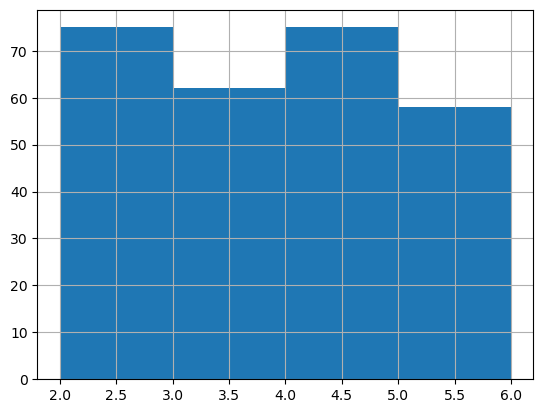

The probability of a group being 4 or more is 0.6769230769230767


In [226]:
# Here in this example we will create a distribution of the consumption column in food_consumption
# Create a histogram of restaurant_groups and show plot
food_consumption['consumption'].hist(bins = [2, 3, 4, 5, 6])
plt.show()

# Calculate the probability distribution of restaurant_groups
size_dist = food_consumption['consumption'].value_counts() / len(food_consumption)
size_dist = size_dist.sort_index(ascending=True)

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']  

# Expected value of restaurant_groups
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(f'The probability of a group being 4 or more is {prob_4_or_more}')

### <font color = "#18A4E0"> Binomial Distribution </font>

Binomial Distribution - The binomial distribution is a discrete distribution that describes the probability of a certain number of successes in a sequence of independent experiments. The binomial distribution is parameterized by two values, n and p. n is the number of trials in the experiment, and p is the probability of success in each trial. The binomial distribution is defined by the following formula:

$$P(X=k) = \binom{n}{k}p^k(1-p)^{n-k}$$

where k is the number of successes in the experiment.

In [227]:
# Binomial Distribution
np.random.seed(10)  

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size = 52)

# Print mean deals won per week
print(f'Mean of deals won per week: {np.mean(deals)}','\n')

# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)
print(f'Probability of closing 3 out 3 deals per week: {prob_3}','\n')

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(f"Probability of closing 1 or less than one deal in a week: {prob_less_than_or_equal_1}",'\n')

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1_cdf = 1 - binom.cdf(1, 3, 0.3)
# or 
prob_greater_than_1_sf = binom.sf(1, 3, 0.3)

print(f'Probability of closing more than 1 deal in a week: {prob_greater_than_1_cdf}')
print(f'Probability of closing more than 1 deal in a week: {prob_greater_than_1_sf}')

Mean of deals won per week: 0.8269230769230769 

Probability of closing 3 out 3 deals per week: 0.026999999999999996 

Probability of closing 1 or less than one deal in a week: 0.784 

Probability of closing more than 1 deal in a week: 0.21599999999999997
Probability of closing more than 1 deal in a week: 0.21599999999999994


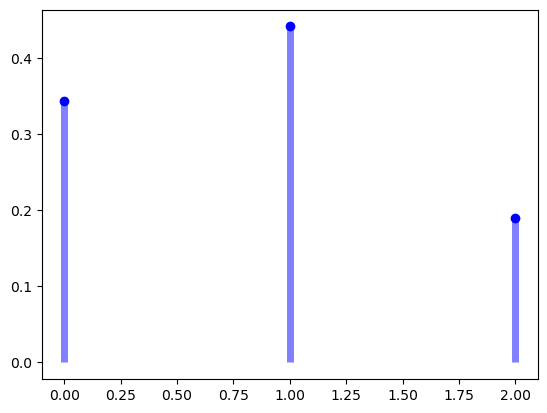

In [195]:
# plot binomial distribution
fig, ax = plt.subplots(1, 1)
x = np.arange(0, 3)
ax.plot(x, binom.pmf(x, 3, 0.3), 'bo')
ax.vlines(x, 0, binom.pmf(x, 3, 0.3), colors='b', lw=5, alpha=0.5)
plt.show()

In [39]:
# Sample mean from a generated sample of 1,000 fair coin flips
sample_mean_1000_flips = describe(binom.rvs(n=1, p=0.5, size=1000)).mean
print(f'The sample mean of 1,000 fair coin flips is {sample_mean_1000_flips}')

# Sample mean from a generated sample of 2,000 fair coin flips
sample_mean_2000_flips = describe(binom.rvs(n=1, p=0.5, size=2000)).mean
print(f'The sample mean of 2,000 fair coin flips is {sample_mean_2000_flips}')

The sample mean of 1,000 fair coin flips is 0.517
The sample mean of 2,000 fair coin flips is 0.507


In [43]:
sample = binom.rvs(n=10, p=0.3, size=2000)

# Calculate the sample mean and variance from the sample variable
sample_describe = describe(sample)

# Calculate the sample mean using the values of n and p
mean = 10*0.3

# Calculate the sample variance using the value of 1-p
variance = mean*(1-0.3)

# Calculate the sample mean and variance for 10 coin flips with p=0.3
binom_stats = binom.stats(n=10, p=0.3)

print(f'The sample mean is {sample_describe.mean} and the sample variance is {sample_describe.variance}')
print(f'The sample mean is {binom_stats[0]} and the sample variance is {binom_stats[1]}')

The sample mean is 2.9865 and the sample variance is 2.1363859429714864
The sample mean is 3.0 and the sample variance is 2.0999999999999996


In [51]:
averages = []
variances = []

for i in range(0, 1500):
	# 10 draws of 10 coin flips with 25% probability of heads
    sample = binom.rvs(n=10, p=0.25, size=10)
	# Mean and variance of the values in the sample variable
    averages.append(describe(sample).mean)
    variances.append(describe(sample).variance)
  
# Calculate the mean of the averages variable
print("Mean {}".format(describe(averages).mean))

# Calculate the mean of the variances variable
print("Variance {}".format(describe(variances).mean))

# Calculate the mean and variance
print(f'The mean is {binom.stats(n=10, p=0.25)[0]} and the variance is {binom.stats(n=10, p=0.25)[1]}')

Mean 2.5098
Variance 1.9079481481481484
The mean is 2.5 and the variance is 1.875


### <font color = "#18A4E0"> Poison Distribtuion </font>

The Poisson distribution is a discrete distribution that describes the probability of a certain number of events occurring in a fixed interval of time or space. The Poisson distribution is parameterized by one value, $\lambda$. $\lambda$ is the average number of events that occur in the interval. The Poisson distribution is defined by the following formula:

$$P(X=k) = \frac{\lambda^ke^{-\lambda}}{k!}$$

where k is the number of events that occur in the interval.

In [ ]:
# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)
print(f'Amir responds to 5 leads if he responds to 4 leads on average: {prob_5}')

# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)
print(f"Amir's coworker responds to 5 leads if he responds to 5.5 leads on average: {prob_coworker}")

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)
print(f"Amir's coworker responds to 2 leads if he responds to 4 leads on average: {prob_2_or_less}")

# Probability of 10 or fewer responses
prob_10_or_more = 1 -  poisson.cdf(10, 4)
print(f"Amir's coworker responds to 10 leads if he responds to 4 leads on average: {prob_10_or_more}")

Amir responds to 5 leads if he responds to 4 leads on average: 0.1562934518505317
Amir's coworker responds to 5 leads if he responds to 5.5 leads on average: 0.17140068409793663
Amir's coworker responds to 2 leads if he responds to 4 leads on average: 0.23810330555354436
Amir's coworker responds to 10 leads if he responds to 4 leads on average: 0.0028397661205137315


**ATM Example** </br></br>

If you know how many specific events occurred per unit of measure, you can assume that the distribution of the random variable follows a Poisson distribution to study the phenomenon.

Consider an ATM (automatic teller machine) at a very busy shopping mall. The bank wants to avoid making customers wait in line to use the ATM. It has been observed that the average number of customers making withdrawals between 10:00 a.m. and 10:05 a.m. on any given day is 1.

As a data analyst at the bank, you are asked what the probability is that the bank will need to install another ATM to handle the load.

To answer the question, you need to calculate the probability of getting more than one customer during that time period.

In [153]:
# Probability of more than 1 customer
probability = poisson.sf(k=1, mu=1)

# Print the result
print(f'The probability of more than 1 customer is {probability}')

# Probability of less than 3 customer
probability = poisson.cdf(k=3, mu=1)
print(f'The probability of less than 3 customer is {probability}')

# Probability of more than 1 customer and less than 3 customer
probability = poisson.cdf(k=3, mu=1) - poisson.cdf(k=1, mu=1)
print(f'The probability of more than 1 customer and less than 3 customer is {probability}')

# Probability of more than 1 customer
probability = poisson.sf(k=1, mu=1)
print(f'The probability of more than 1 customer is {probability}')

The probability of more than 1 customer is 0.2642411176571153
The probability of less than 3 customer is 0.9810118431238462
The probability of more than 1 customer and less than 3 customer is 0.24525296078096148
The probability of more than 1 customer is 0.2642411176571153


**Highway accidents Example** </br></br>

On a certain turn on a very busy highway, there are 2 accidents per day. Let's assume the number of accidents per day can be modeled as a Poisson random variable and is distributed as in the following plot: </br></br>
![](https://assets.datacamp.com/production/repositories/3819/datasets/1a4cb33d15fdc97987a153fbaae96485107ae00b/accidents.png)

In [158]:
# Probability of 5 accidents any day
P_five_accidents = poisson.pmf(k=5, mu=2)
print(f'The probability of 5 accidents any day is {P_five_accidents}')

# Probability of having 4 or 5 accidents on any day
P_less_than_6 = poisson.cdf(k=5, mu=2)
P_less_than_4 = poisson.cdf(k=3, mu=2)
P_4_or_5 = P_less_than_6 - P_less_than_4
print(f'The probability of having 4 or 5 accidents on any day is {P_4_or_5}')

# Probability of more than 3 accidents any day
P_more_than_3 = poisson.sf(k=3, mu=2)
print(f'The probability of more than 3 accidents any day is {P_more_than_3}')

# Number of accidents with 0.75 probability
accidents = poisson.ppf(q=0.75, mu=2)
print(f'The number of accidents with 0.75 probability is {accidents}')

The probability of 5 accidents any day is 0.03608940886309672
The probability of having 4 or 5 accidents on any day is 0.12631293102083851
The probability of more than 3 accidents any day is 0.14287653950145296
The number of accidents with 0.75 probability is 3.0


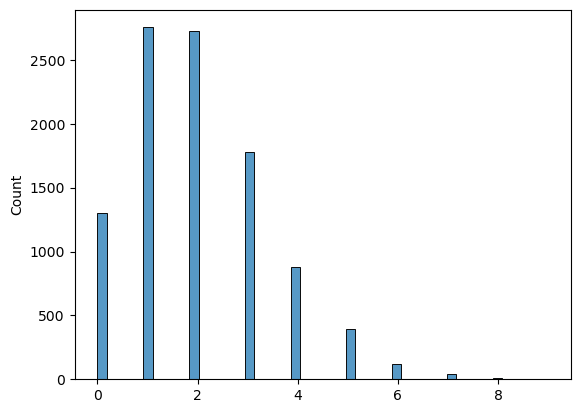

In [162]:
# Create the sample
sample = poisson.rvs(mu=2, size=10000, random_state=13)

# Plot the sample
sns.histplot(sample, kde=False)
plt.show()

### <font color = "#18A4E0"> Geometric Distribution </font>

Geomtric Distribution - The geometric distribution is a discrete distribution that describes the probability of a certain number of trials until the first success in a sequence of independent experiments. The geometric distribution is parameterized by one value, p. p is the probability of success in each trial. The geometric distribution is defined by the following formula:

$$P(X=k) = (1-p)^{k-1}p$$

where k is the number of trials until the first success.

**Catching salmon example** </br></br>

Every fall the salmon run occurs -- this is the time when salmon swim back upriver from the ocean to spawn. While swimming back to the upper river (usually to the place where they were spawned), the fish may encounter grizzly bears. Some of these bears can eat 18 salmon in 3 hours, and they have a 0.0333 probability of success in their attempts to catch a fish.

We can model a grizzly bear catching salmon with a geometric distribution.

In [171]:
# Getting a salmon on the third attempt
probability = geom.pmf(k=3, p=0.0333)
print(f'The probability of getting a salmon on the third attempt is {probability}\n')

# Probability of getting a salmon in less than 5 attempts
probability = geom.cdf(k=4, p=0.0333)
print(f'The probability of getting a salmon in less than 5 attempts is {probability}\n')

# Probability of getting a salmon in less than 21 attempts
probability = geom.cdf(k=20, p=0.0333)
print(f'The probability of getting a salmon in less than 21 attempts is {probability}\n')

# Attempts for 0.9 probability of catching a salmon
attempts = geom.ppf(q=0.9, p=0.0333)
print(f'The attempts for 0.9 probability of catching a salmon is {attempts}\n')

The probability of getting a salmon on the third attempt is 0.031119146037000004

The probability of getting a salmon in less than 5 attempts is 0.1266931345109679

The probability of getting a salmon in less than 21 attempts is 0.4920343187252892

The attempts for 0.9 probability of catching a salmon is 68.0



**Free throws example** </br></br>
Suppose you know that a basketball player has a 0.3 probability of scoring a free throw. What is the probability of them missing with the first throw and scoring with the second?

The probability of missing first and scoring on second throw is 0.21



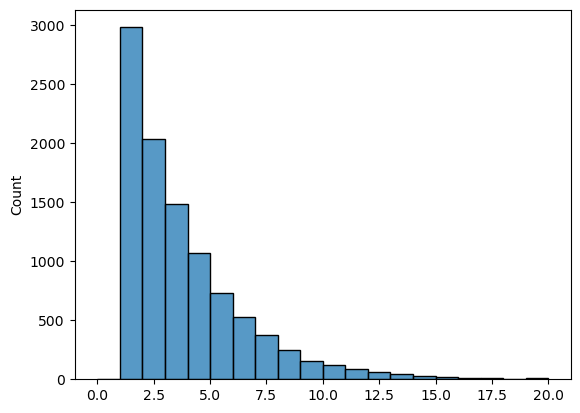

In [173]:
# Probability of missing first and scoring on second throw
probability = geom.pmf(k=2, p=0.3)
print(f'The probability of missing first and scoring on second throw is {probability}\n')

# Create the sample
sample = geom.rvs(p=0.3, size=10000, random_state=13)

# Plot the sample
sns.histplot(sample, bins = np.linspace(0,20,21), kde=False)
plt.show()

## <font color = "#6C98C6"> Continous Distributions </font>


Continous distributions are distributions where the possible values are not countable. The most common continous distributions are the uniform distribution, the normal distribution, and the exponential distribution.

In [33]:
# Unifrom Continous Distribution

# Min and max wait times for back-up that happens every 30 mins. Max time has been set to be random between 30 and 60 mins
min_time = 0
max_time = np.random.randint(30, 60)

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(f'Probability of waiting less than 5 minutes is {prob_less_than_5}','\n')

# Calculate probability of waiting more than 5 mins
prob_more_than_5 = 1 - uniform.cdf(5, min_time, max_time)
prob_10_or_more = uniform.sf(5, min_time, max_time)
print(f'Probability of waiting more than 5 minutes is {prob_more_than_5}','\n')

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(f'Probability of waiting between 10 to 20 minutes is {prob_between_10_and_20}','\n')

Probability of waiting less than 5 minutes is 0.11627906976744186 

Probability of waiting more than 5 minutes is 0.8837209302325582 

Probability of waiting between 10 to 20 minutes is 0.23255813953488372 



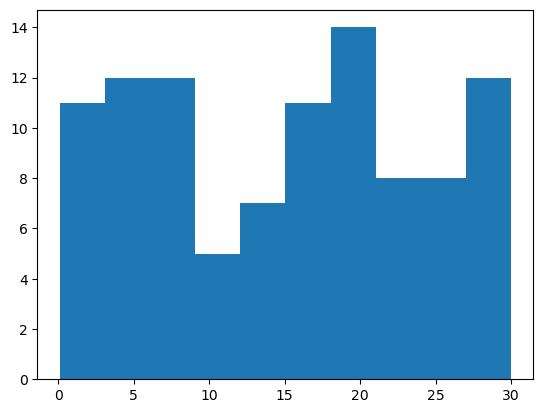

In [62]:
# Set random seed to 334
np.random.seed(334)

wait_time = uniform.rvs(0,30,size=100)
plt.hist(wait_time)
plt.show()

### <font color = "#18A4E0"> Histograms </font>


Histograms are a way of visualizing the distribution of a set of data. A histogram is a bar graph where the height of each bar represents the frequency of the data in that range. The width of each bar represents the range of the data in that bar. The x-axis of a histogram represents the range of the data, and the y-axis represents the frequency of the data in that range.

Probability of deal less than 7500 is 0.8943502263331446 

Probability of deal greater than 1000 is 0.9772498680518208 

Probability of deal between 3000 and 7000 is 0.6826894921370859 

2.5% of deals will be less than 1080.072030919891 

97.5% of deals will be less than 8919.927969080109 



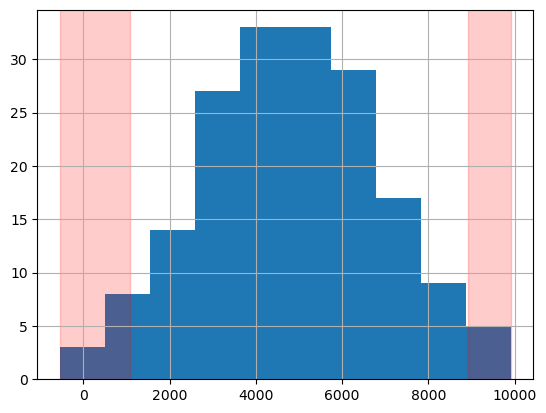

In [109]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)
print(f'Probability of deal less than 7500 is {prob_less_7500}','\n')

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)
print(f'Probability of deal greater than 1000 is {prob_over_1000}','\n')

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
print(f'Probability of deal between 3000 and 7000 is {prob_3000_to_7000}','\n')

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.025, 5000, 2000)
print(f'2.5% of deals will be less than {pct_25}','\n')
pct_975 = norm.ppf(0.975, 5000, 2000)
print(f'97.5% of deals will be less than {pct_975}','\n')

# Histogram of amount with 10 bins and show plot
fig, ax = plt.subplots()
ax = amir_deals['amount'].hist(bins = 10)
ax.axvspan(min(amir_deals['amount']), pct_25, color = 'red', alpha = 0.2, label = '25% of deals')
ax.axvspan(pct_975, max(amir_deals['amount']), color = 'red', alpha = 0.2)
plt.show()

### <font color = "#18A4E0"> Normal Distribution </font>

The normal distribution is a continous distribution that is defined by a mean and a standard deviation. The normal distribution is defined by the following formula:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

where $\mu$ is the mean of the distribution, $\sigma$ is the standard deviation of the distribution, and x is the value of the distribution. The normal distribution is also known as the Gaussian distribution. 

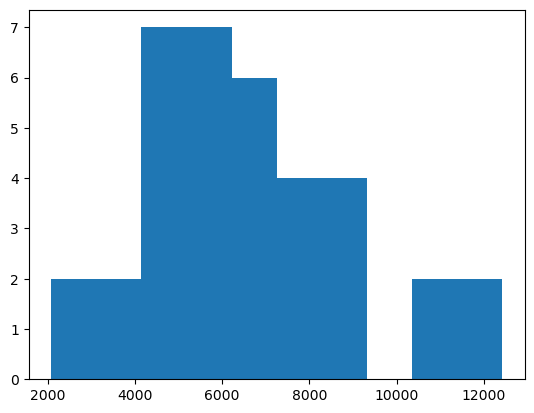

In [139]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size = 36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

32.0
List of means: 
[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1] 



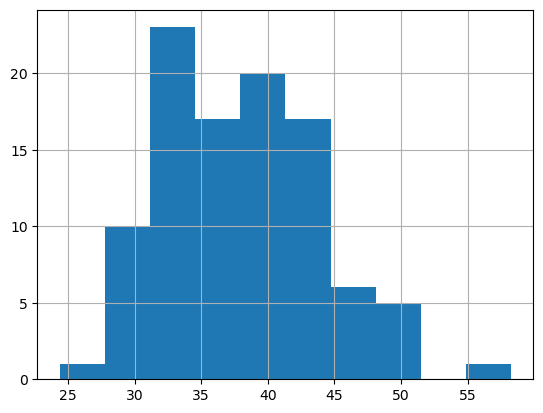

In [110]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace = True)

# Take mean of samp_20
print(np.mean(samp_20))

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
print(f'List of means: \n{sample_means}','\n')

# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

In [111]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
#   Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = amir_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

# Based on the calculation we can see how the central limit theorem works

38.821666666666665
37.651685393258425


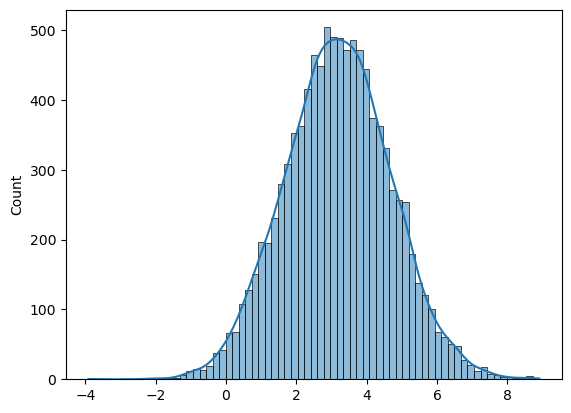

In [125]:
# Create the sample using norm.rvs()
sample = norm.rvs(loc=3.15, scale=1.5, size=10000, random_state=13)

# Plot the sample
sns.histplot(sample, kde=True)
plt.show()

**Restaurant spending example** </br></br>
The data shows that the spending is approximately normally distributed, with a mean of 3.15 and a standard deviation of 1.5 per customer, as pictured in the plot. </br></br>
![](https://assets.datacamp.com/production/repositories/3819/datasets/a12cc9f77ceec6bc22691386c4470a11433b16c6/ch3l2ex2.png) </br></br>
Let's answer some questions about the data.

In [130]:
# Probability of spending $3 or less
spending = norm.cdf(3, loc=3.15, scale=1.5)
print(f'Probability of spending $3 or less is {spending}','\n')

# Probability of spending more than $5
spending = norm.sf(5, loc=3.15, scale=1.5)
print(f'Probability of spending more than $5 is {spending}','\n')

# Probability of spending more than $2.15 and $4.15 or less
spending_4 = norm.cdf(4.15, loc=3.15, scale=1.5)
spending_2 = norm.cdf(2.15, loc=3.15, scale=1.5)
spending = spending_4 - spending_2
print(f'Probability of spending more than $2.15 and $4.15 or less is {spending}','\n')

# What is the probability that a customer will spend $2.15 or less or more than $4.15?
spending_4 = norm.sf(4.15, loc=3.15, scale=1.5)
spending_2 = norm.cdf(2.15, loc=3.15, scale=1.5)
spending = spending_4 + spending_2
print(f'Probability of spending $2.15 or less or more than $4.15 is {spending}','\n')

Probability of spending $3 or less is 0.46017216272297107 

Probability of spending more than $5 is 0.10872571321259111 

Probability of spending more than $2.15 and $4.15 or less is 0.4950149249061543 

Probability of spending $2.15 or less or more than $4.15 is 0.5049850750938457 



**Smartphone battery example** </br></br>

One of the most important things to consider when buying a smartphone is how long the battery will last.

Suppose the period of time between charges can be modeled with a normal distribution with a **mean of 5 hours** and a **standard deviation of 1.5 hours.**

A friend wants to buy a smartphone and is asking you the following questions.

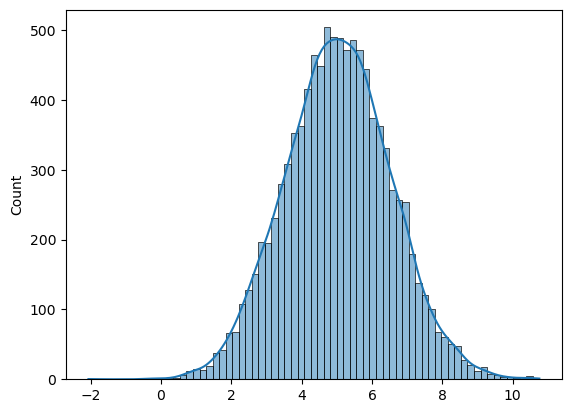

In [135]:
smartphone = norm.rvs(loc=5, scale=1.5, size=10000, random_state=13)
# Plot the sample
sns.histplot(smartphone, kde=True)
plt.show()

In [133]:
# Probability that battery will last less than 3 hours
less_than_3h = norm.cdf(3, loc=5, scale=1.5)
print(f'Probability that battery will last less than 3 hours is {less_than_3h}','\n')

# Probability that battery will last more than 3 hours
more_than_3h = norm.sf(3, loc=5, scale=1.5)
print(f'Probability that battery will last more than 3 hours is {more_than_3h}','\n')

# Probability that battery will last between 5 and 7 hours
between_5_and_7 = norm.cdf(7, loc=5, scale=1.5) - norm.cdf(5, loc=5, scale=1.5)
print(f'Probability that battery will last between 5 and 7 hours is {between_5_and_7}','\n')

Probability that battery will last less than 3 hours is 0.09121121972586788 

Probability that battery will last more than 3 hours is 0.9087887802741321 

Probability that battery will last between 5 and 7 hours is 0.4087887802741321 



**Adults' heights example** </br></br>
The heights of adults aged between 18 and 35 years are normally distributed. For males, the <font color = 'dodgerblue'>**mean height is 70 inches with a standard deviation of 4** </font>. Adult females have a <font color = 'indianred'>**mean height of 65 inches with a standard deviation of 3.5**.</font> You can see how the heights are distributed in this plot: </br></br>
![](https://assets.datacamp.com/production/repositories/3819/datasets/f87c00739d12771e61e77a2cc97449c98f106afd/male-females.png) </br></br>


In [148]:
# Values one standard deviation from mean height for females
interval = norm.interval(0.68, loc=65, scale=3.5)
print(f'One standard deviation interval would be {interval}','\n')

# Value where the tallest males fall with 0.01 probability
tallest = norm.ppf(0.99, loc=70, scale=4)
print(f'Tallest male is {tallest} inches tall','\n')

# Probability of being taller than 73 inches for males and females
P_taller_male = norm.sf(73, loc=70, scale=4)
P_taller_female = norm.sf(73, loc=65, scale=3.5)
print(f'Probability for men to be taller than 73 inches is {P_taller_male}')
print(f'Probability for women to be taller than 73 inches is {P_taller_female}')

# Probability of being shorter than 61 inches for males and females
P_shorter_male = norm.cdf(61, loc=70, scale=4)
P_shorter_female = norm.cdf(61, loc=65, scale=3.5)
print(f'Probability for men to be shorter than 61 inches is {P_shorter_male}')
print(f'Probability for women to be shorter than 61 inches is {P_shorter_female}')

One standard deviation interval would be (61.51939740876586, 68.48060259123413) 

Tallest male is 79.30539149616337 inches tall 

Probability for men to be taller than 73 inches is 0.2266273523768682
Probability for women to be taller than 73 inches is 0.011135489479616392
Probability for men to be shorter than 61 inches is 0.012224472655044696
Probability for women to be shorter than 61 inches is 0.12654895447355774


### <font color = "#18A4E0"> Exponential Distribution </font>


The exponential distribution is a continous distribution that describes the probability of a certain amount of time passing before an event occurs. The exponential distribution is parameterized by one value, $\lambda$. $\lambda$ is the average rate of the event. The exponential distribution is defined by the following formula:

$$f(x) = \lambda e^{-\lambda x}$$

where x is the amount of time that has passed.

In [167]:
# Print probability response takes < 1 hour
print(f"The probability that Amir takes less than an hour is: {expon.cdf(1, scale=2.5)}")

# Print probability response takes > 4 hours
print(f"The probability that Amir takes more than 4 hour is: {1 - expon.cdf(4, scale=2.5)}")

# Print probability response takes 3-4 hours
print(f"The probability that Amir takes more than 3 to 4 hour is: {expon.cdf(4, scale = 2.5) - expon.cdf(3, scale = 2.5)}")

The probability that Amir takes less than an hour is: 0.3296799539643607
The probability that Amir takes more than 4 hour is: 0.20189651799465536
The probability that Amir takes more than 3 to 4 hour is: 0.09929769391754684


## <font color = "#6C98C6"> Correlation </font>

Correlation is a measure of how closely two variables are related. Correlation is a value between -1 and 1. A correlation of 1 means that the two variables are perfectly positively correlated. A correlation of -1 means that the two variables are perfectly negatively correlated. A correlation of 0 means that the two variables are not correlated at all. Correlation is a useful tool for understanding the relationship between two variables. Correlation is not causation. Just because two variables are correlated does not mean that one causes the other.

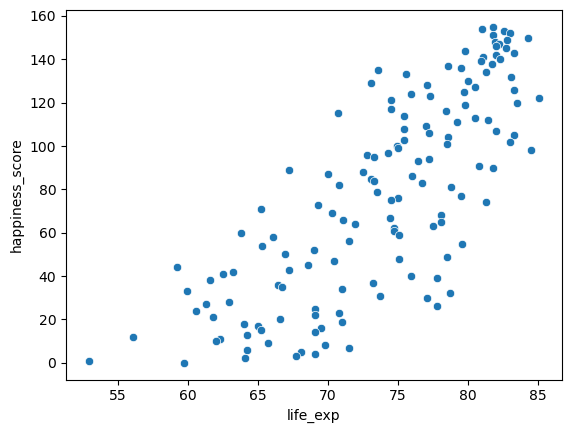

0.7802249053272062


In [174]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)
plt.show()

# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

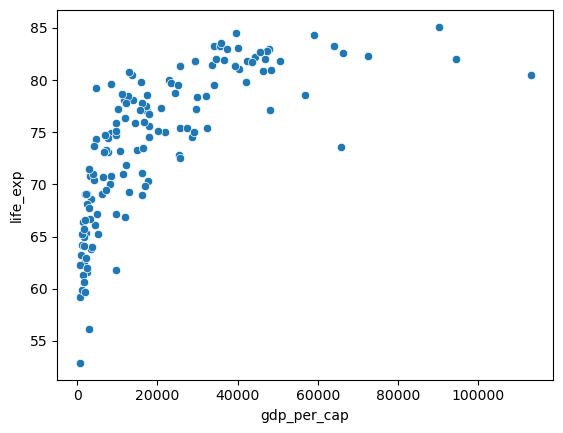

0.7019547642148012


In [176]:
sns.scatterplot(y='life_exp',x='gdp_per_cap',data=world_happiness)
plt.show()
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])
print(cor)

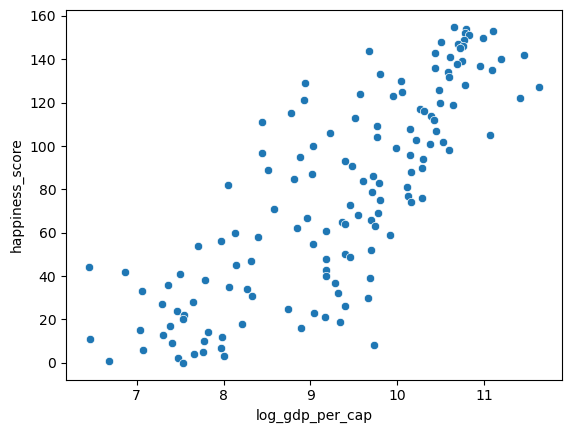

0.8043146004918288
Index(['Unnamed: 0', 'country', 'social_support', 'freedom', 'corruption',
       'generosity', 'gdp_per_cap', 'life_exp', 'happiness_score',
       'log_gdp_per_cap'],
      dtype='object')


In [180]:
# When variables have skewed distributions, they often require a transformation in order to form a linear relationship with another variable
# so that correlation can be computed.

# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap',y='happiness_score',data=world_happiness)
plt.show()
# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)
print(world_happiness.columns)

## <font color = "#6C98C6">  Sample Mean and Population Mean </font>

In [ ]:
# Generate a sample of 250 newborn children
sample = binom.rvs(n=1, p=0.505, size=250, random_state=42)

print(f'Mean of first 10 samples: {describe(sample[0:11]).mean}') 
print(f'Mean of first 50 samples: {describe(sample[0:51]).mean}') 
print(f'Mean of first 250 samples: {describe(sample[0:251]).mean}') 

Mean of first 10 samples: 0.45454545454545453
Mean of first 50 samples: 0.5490196078431373
Mean of first 250 samples: 0.504


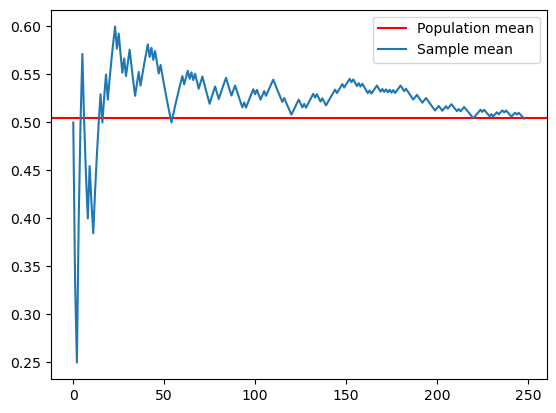

In [ ]:
# Calculate sample mean and store it on averages array
averages = []
for i in range(2, 251):
    averages.append(describe(sample[0:i]).mean)

# Add population mean line and sample mean plot
plt.axhline(binom.mean(n=1, p=0.505), color='red')
plt.plot(averages, '-')

# Add legend
plt.legend(("Population mean","Sample mean"), loc='upper right')
plt.show()

We can see that as samples increase the sample mean gets closer to the population mean. This is because the sample mean is the average of the sample, and the population mean is the average of the population. As the sample size increases, the sample mean gets closer to the population mean. THis is also known as the **Law of Large Numbers.**

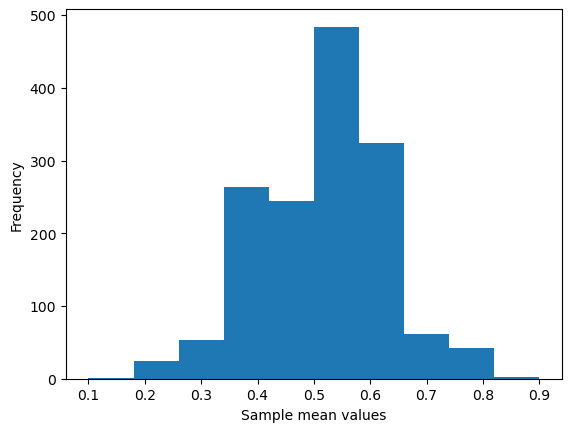

In [ ]:
population = binom.rvs(n=1, p=0.505, size=1000, random_state=42)
# Create list for sample means
sample_means = []
for _ in range(1500):
	# Take 20 values from the population
    sample = np.random.choice(population, 20)
    # Calculate the sample mean
    sample_means.append(describe(sample).mean)

# Plot the histogram
plt.hist(sample_means)
plt.xlabel("Sample mean values")
plt.ylabel("Frequency")
plt.show()

**Sample means follow a normal distribution** </br></br>
In the previous exercise, we generated a population that followed a binomial distribution, chose 20 random samples from the population, and calculated the sample mean. Now we're going to test some other probability distributions to see the shape of the sample means.

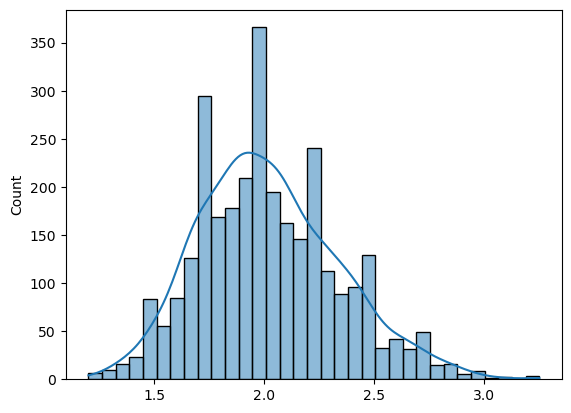

In [232]:
# Generate the population
population = geom.rvs(p=0.5, size=1000)

# Create list for sample means
sample_means = []
for _ in range(3000):
	# Take 20 values from the population
    sample = np.random.choice(population, 20)
    # Calculate the sample mean
    sample_means.append(describe(sample).mean)

sns.histplot(sample_means, kde=True)
plt.show()

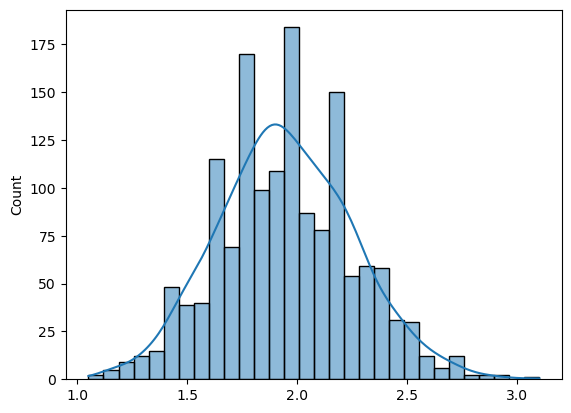

In [235]:
# Generate the population
population = poisson.rvs(mu=2, size=1000)

# Create list for sample means
sample_means = []
for _ in range(1500):
	# Take 20 values from the population
    sample = np.random.choice(population, 20)
    # Calculate the sample mean
    sample_means.append(describe(sample).mean)

# Plot the histogram
sns.histplot(sample_means, kde=True)
plt.show()